In [355]:
import sys
!conda install --yes cartopy dask netCDF4 bottleneck
pip install sklearn_xarray

SyntaxError: invalid syntax (<ipython-input-355-9aedb02ee9df>, line 3)

In [138]:
import sys
! -m pip install sklearn_xarray


/bin/sh: -m: command not found


In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import cartopy as ccrs
from matplotlib import pyplot as plt
%matplotlib inline

Looking at 1979-2018 Rainfall on the state of California, (NOA extRealtime precipitation) as well as the ENSO anomalies

In [245]:
precipurlbymonth="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%28130W%29/%28100W%29/RANGE/Y/25/50/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
precipds=xr.open_dataset(precipurlbymonth)
ninourl="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/%5BX/Y%5Daverage/zlev/removeGRID/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/yearly-anomalies/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
ninods=xr.open_dataset(ninourl)
ninods
precipds


<xarray.Dataset>
Dimensions:  (T: 480, X: 62, Y: 52)
Coordinates:
  * X        (X) float32 -130.25 -129.75 -129.25 ... -100.75 -100.25 -99.75
  * Y        (Y) float32 24.75 25.25 25.75 26.25 ... 48.75 49.25 49.75 50.25
  * T        (T) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
Data variables:
    rain     (T, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


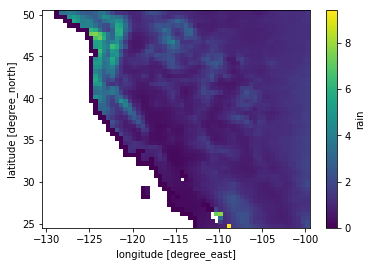

In [5]:
precipds.rain.mean(dim="T").plot()

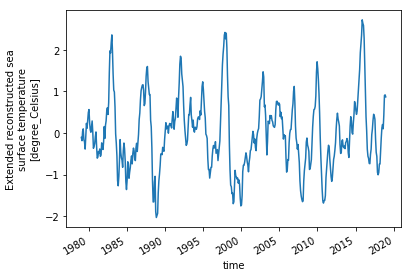

In [6]:
ninods.sst.plot()

In [142]:
wind

wind = xr.open_dataset("http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-DOE/.Reanalysis-2/.Monthly/.pgb/.pgb/.ugrdprs/P/200/VALUE/X/220/240/RANGE/Y/27/40/RANGE/[X/Y]average/SOURCES/.NOAA/.NCEP-DOE/.Reanalysis-2/.Monthly/.pgb/.pgb/.ugrdprs/P/200/VALUE/X/210/240/RANGE/Y/45/60/RANGE/[X/Y]average/sub/P/removeGRID/T/(days%20since%201960-01-01)streamgridunitconvert/dods")

In [143]:
wind

<xarray.Dataset>
Dimensions:  (T: 480)
Coordinates:
  * T        (T) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
Data variables:
    ugrdprs  (T) float64 ...
Attributes:
    Conventions:  IRIDL

In [141]:


precipdegreeurl="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%28130W%29/%28100W%29/RANGE/Y/25/50/RANGE/X/1/boxAverage/Y/1/boxAverage/T/%28days%20since%201960-01-01%29streamgridunitconvert/dods"
precipdsdegree=xr.open_dataset(precipdegreeurl)
#precipdsdegree=precipdsdegree.drop("")

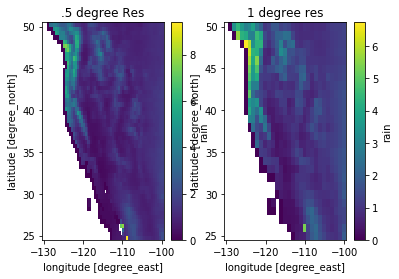

In [25]:
#compare resolutions 
plt.subplot(1, 2,1)
precipds.rain.mean(dim="T").plot()
plt.title('.5 degree Res')

plt.subplot(1, 2,2)
precipdsdegree.rain.mean(dim="T").plot()
plt.title('1 degree res')
plt.show()


In [98]:
precipanom=precipds.groupby('T.month') - precipds.groupby('T.month').mean('T')
Spn=(precipanom.rain*ninods.sst).groupby("T.month").mean("T")
Sn = ninods.sst.groupby('T.month').std('T')
Sp = precipanom.rain.groupby('T.month').std('T')
Cpn = Spn/Sn/Sp
windanom=wind.groupby("T.month")-wind.groupby("T.month").mean("T")
Swn=(windanom.ugrdprs*ninods.sst).groupby("T.month").mean("T")
Sw = windanom.ugrdprs.groupby('T.month').std('T')
Cwn=Swn/Sn/Sw
vn=ninods.sst.groupby('T.month').var('T')
vw=windanom.ugrdprs.groupby('T.month').var('T')
Spw=(windanom.ugrdprs*precipanom.rain).groupby("T.month").mean("T")
Cpw=Spw/Sw/Sp
Bpn=Spn/vn
Bpw=Spw/vw

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [96]:
precipanomdegree=precipdsdegree.groupby('T.month') - precipdsdegree.groupby('T.month').mean('T')
Spndegree=(precipanomdegree.rain*ninods.sst).groupby("T.month").mean("T")
Spdegree = precipanomdegree.rain.groupby('T.month').std('T')
Cpndegree = Spndegree/Sn/Spdegree
Spwdegree=(windanom.ugrdprs*precipanomdegree.rain).groupby("T.month").mean("T")
Cpwdegree=Spwdegree/Sw/Spdegree
Bpndegree=Spndegree/vn
Bpwdegree=Spwdegree/vw

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Function that calculates correlation and formats data for the map

In [363]:
def sample_data(month,typeof,resolution):
    if typeof=="Cpn":
        if resolution=="half":
            data=Cpn[month]
        else:
            data=Cpndegree[month]
    elif typeof=="Cpw":
        if resolution=="half":
            data=Cpw[month]
        else:
            data=Cpwdegree[month]
    elif typeof=="Bpw":
        if resolution=="half":
            data=Bpw[month]
        else:
            data=Bpwdegree[month]
    else:
        if resolution=="half":
            data=Bpn[month]
        else:
            data=Bpndegree[month]
    nlats, nlons = np.shape(data)
    if resolution=="half":
        lats = np.linspace(24.75,50.25, nlats)
        lons= np.linspace(-130.25,-99.75,nlons)
    else:
        lats = np.linspace(25,50, nlats)
        lons= np.linspace(-130,-100,nlons)
    lons, lats = np.meshgrid(lons, lats)
    return lons, lats, data


Function that plots map

In [45]:
#basic map plotter 
import cartopy.io.shapereader as shpreader

def main(month,typeof,resolution,title):
    central_lon, central_lat = -115, 40
    extent = [-130,-100,25, 50]
    ax = plt.axes(projection=ccrs.crs.Robinson())
    ax.set_title(title)
    ax.set_extent(extent)
    ax.gridlines()
    ax.coastlines(resolution='50m')
    lons, lats, data = sample_data(month,typeof,resolution)
    cb=ax.contourf(lons, lats, data,transform=ccrs.crs.PlateCarree(),cmap='nipy_spectral')
    plt.colorbar(cb, cmap='nipy_spectral', orientation='vertical',ticklocation='auto')
    levels = [-1,-.316,0,.316,1]
    ax.contourf(lons, lats, data,levels=levels,hatches=["."," "," ","."], alpha=1)
    plt.show()




Subplot function: 

In [366]:
import cartopy.feature as cfeature
def maincpn(month,resolution,title):
    central_lon, central_lat = -115, 40
    extent = [-130,-100,25, 50]
    month=["Nov","Dec","Jan","Feb"]
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
    for i,j in enumerate([ax1,ax2,ax3,ax4]):
        j.set_title("Cpn "+month[i])
        j.set_extent(extent)
        j.gridlines()
        j.coastlines(resolution="50m")
        j.add_feature(cfeature.STATES)
        lonsn, latsn, datan = sample_data(10,"Cpn",resolution)
        cbn=j.contourf(lonsn, latsn, datan,transform=ccrs.crs.PlateCarree(),cmap='nipy_spectral')
        plt.colorbar(cbn, cmap='nipy_spectral', orientation='vertical',ticklocation='auto',ax=j)
def maincpw(month,resolution,title):
    central_lon, central_lat = -115, 40
    extent = [-130,-100,25, 50]
    month=["Nov","Dec","Jan","Feb"]
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
    for i,j in enumerate([ax1,ax2,ax3,ax4]):
        j.set_title("Cpn "+month[i])
        j.set_extent(extent)
        j.gridlines()
        j.coastlines(resolution="50m")
        j.add_feature(cfeature.STATES)
        lonsn, latsn, datan = sample_data(10,"Cpw",resolution)
        cbn=j.contourf(lonsn, latsn, datan,transform=ccrs.crs.PlateCarree(),cmap='nipy_spectral')
        plt.colorbar(cbn, cmap='nipy_spectral', orientation='vertical',ticklocation='auto',ax=j)

Precip Nino corr at half degree resolution 

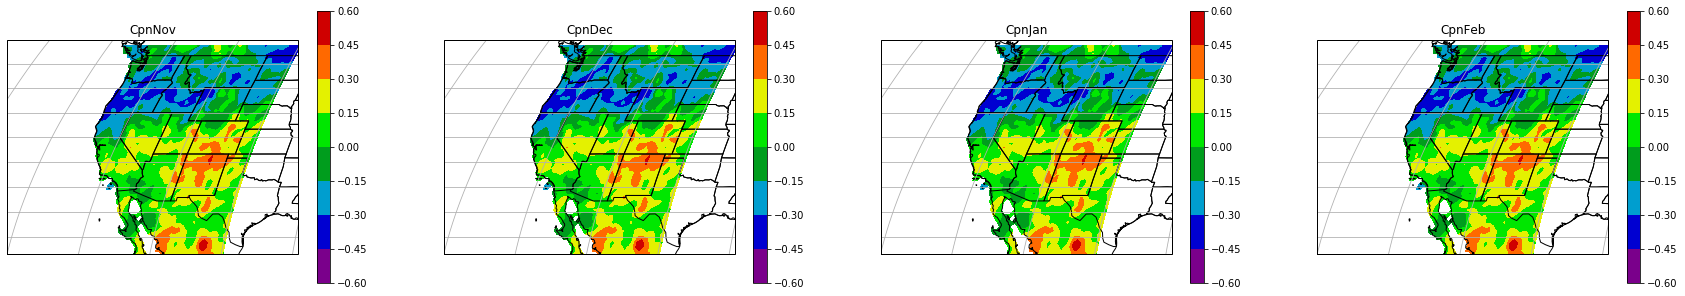

In [365]:

if __name__ == '__main__':
    maincpn(10,"half","title")


In [ ]:
Full Degree resolution: (Nino precip correlations)

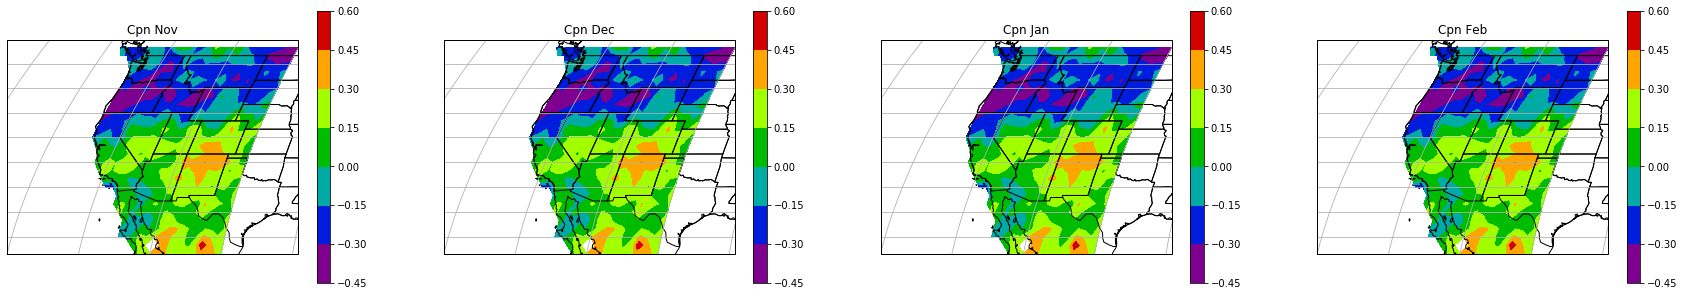

In [367]:
if __name__ == '__main__':
    maincpn(10,"one","title")

In [ ]:
Half Degree resolution: (Wind precip correlation )

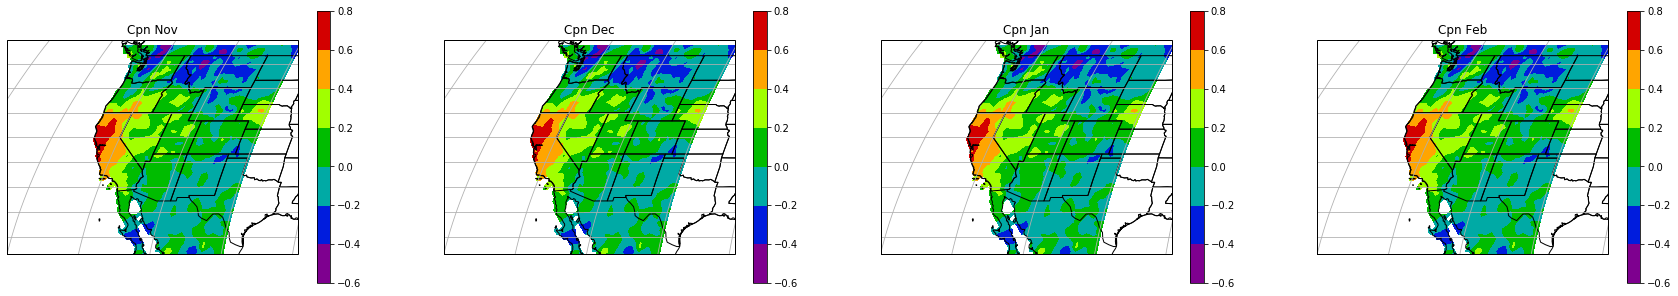

In [368]:

if __name__ == '__main__':
    maincpw(10,"half","title")

One degree resolution: (Wind precip)

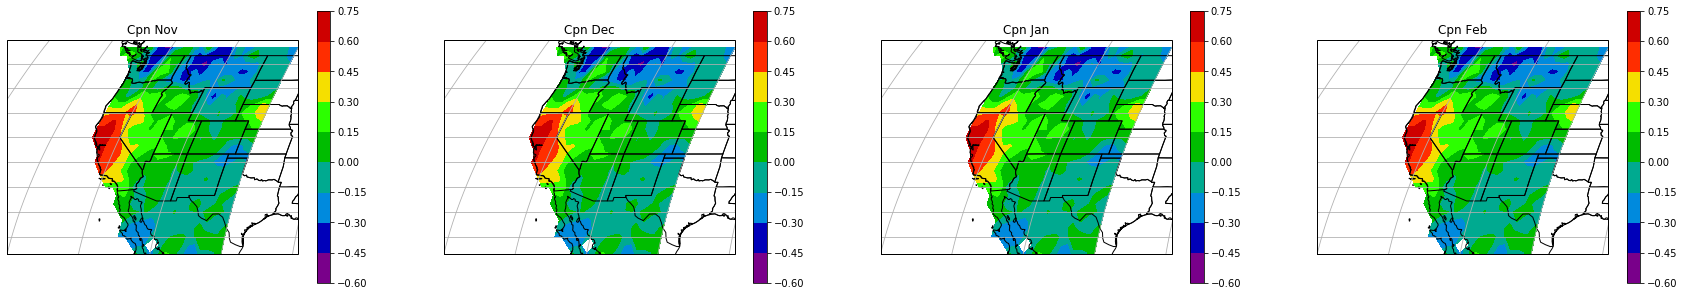

In [369]:

if __name__ == '__main__':
    maincpw(10,"one","title")

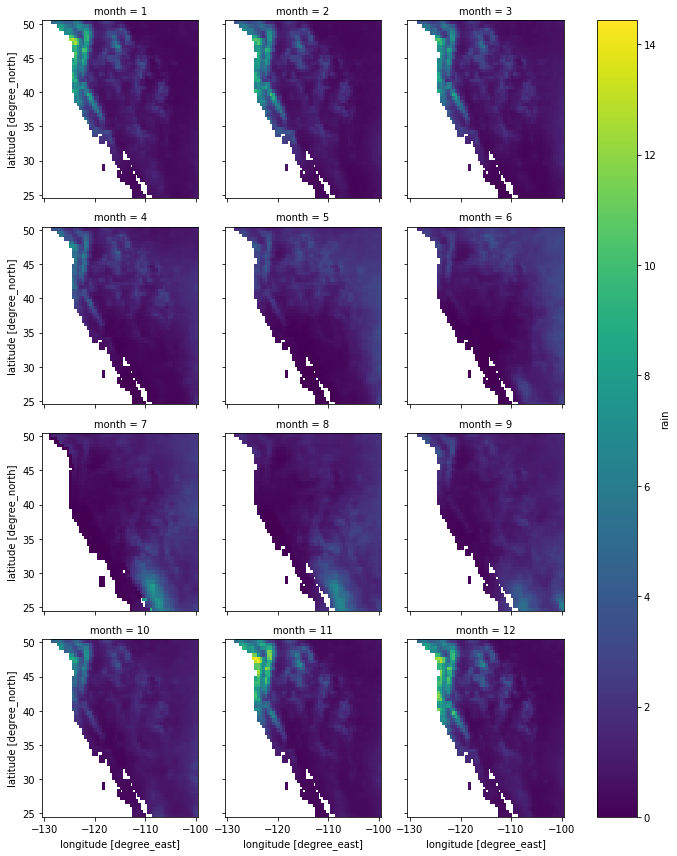

In [109]:
precipds.rain.groupby("T.month").mean("T").plot(x='X', y='Y', col='month', col_wrap=3)

Regression: 

In [399]:
vn=ninods.sst.groupby('T.month').var('T')
vw=windanom.ugrdprs.groupby('T.month').var('T')
Bpn=Spn/vn
Bpn_0=precipanom.rain.mean("T")-ninods.sst.groupby('T.month').mean("T")*Bpn
Bpw=Spw/vw
Bpw_0=precipanom.rain.mean("T")-wind.ugrdprs.groupby("T.month").mean("T")*Bpw
Bpw_0

<xarray.DataArray (Y: 52, X: 62, month: 12)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-0.024236,  0.101722, ...,  0.009686, -0.014018],
        [ 0.00194 ,  0.055083, ...,  0.011493, -0.016994]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-0.012325,  0.120551, ...,  0.016353, -0.017326],
        [ 0.015686,  0.078259, ...,  0.01998 , -0.01219 ]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 0.010171, -0.121477, ..., -0.018408,  0.007514],
        [ 0.004249, -0.123412, ..., -0.036852,  0.009628]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 0.00804 , -0.082331, ..., -0.030216,  0.009444],

Multi linear regression 

In [377]:
precipanomnongroup=precipds - precipds.mean('T')
precipanom
windanomnongroup=wind-wind.mean("T")
precipanom

<xarray.Dataset>
Dimensions:  (T: 480, X: 62, Y: 52)
Coordinates:
  * X        (X) float32 -130.25 -129.75 -129.25 ... -100.75 -100.25 -99.75
  * Y        (Y) float32 24.75 25.25 25.75 26.25 ... 48.75 49.25 49.75 50.25
  * T        (T) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
Data variables:
    rain     (T, Y, X) float32 nan nan nan ... -0.8843869 -1.0078545 -1.1128409

In [380]:
def pd_regress(x,y,month):
    precipdsmonth=precipds.sel(T=precipds['T.month']==month)
    windmonth=wind.sel(T=wind["T.month"]==month)
    ninodsmonth=ninods.sel(T=ninods["T.month"]==month)
    windcoef=np.empty((52,62))
    sstcoef=np.empty((52,62))
    cons=np.empty((52,62))
    rain=precipdsmonth.rain-precipds.rain.mean("T")
    windvar=windmonth.ugrdprs-wind.ugrdprs.mean("T")
    sstvar=ninodsmonth.sst
    a_array=np.ones((40,3))
    a_array[:,0]=sstvar
    a_array[:,1]=windvar
    a_matrix=np.matmul(np.transpose(a_array),a_array)
    for i in range(62):
        for j in range(52):
            b_array=np.array(rain.sel(Y=y[j,i],X=x[j,i]))
            B=np.matmul(np.transpose(a_array),b_array)
            X=np.linalg.solve(a_matrix,B) 
            windcoef[j,i]=X[0]
            sstcoef[j,i]=X[1]
            cons[j,i]=X[2]
    return windcoef,sstcoef,cons,b_array
def sample_dataregress(month,shape=(62, 52)):
    """Return ``lons``, ``lats`` and ``data`` of some fake data."""
    nlons, nlats = shape
    lats = np.linspace(24.75,50.25, nlats)
    lons= np.linspace(-130.25,-99.75,nlons)
    lons, lats = np.meshgrid(lons, lats)
    datasst = pd_regress(lons,lats,month)[0]
    datawind = pd_regress(lons,lats,month)[1]
    const=pd_regress(lons,lats,month)[2]
    precip=pd_regress(lons,lats,month)[3]
    return lons, lats, datasst,datawind,const,precip
#plot the coeffcicienys
#average over space and do an f test 

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

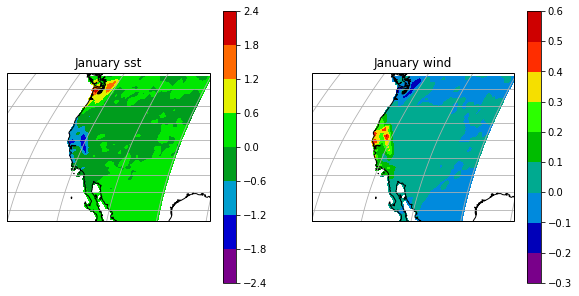

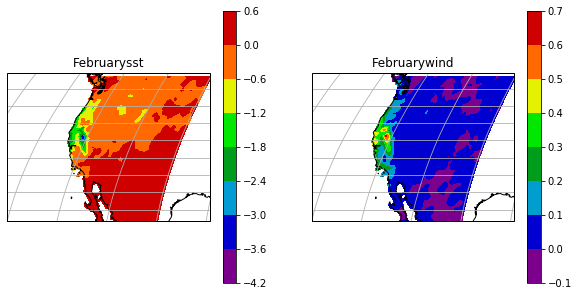

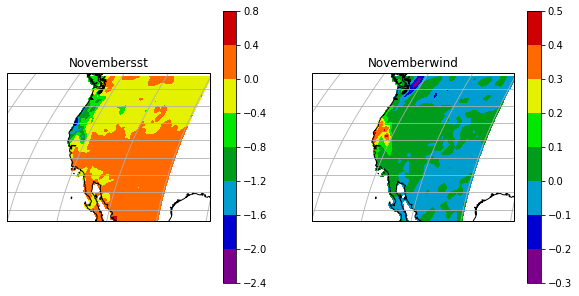

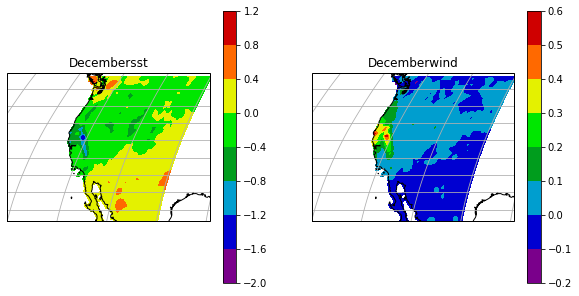

In [381]:

def main(month,title):
    central_lon, central_lat = -115, 40
    extent = [-130,-100,25, 50]
    fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(10,5))
    ax1.set_title(title+"sst")
    ax1.set_extent(extent)
    ax1.gridlines()
    ax1.coastlines(resolution='50m')
    lons, lats, datasst,datawind,const,b= sample_dataregress(month)
    cb=ax1.contourf(lons, lats, datasst,transform=ccrs.crs.PlateCarree(),cmap='nipy_spectral')
    plt.colorbar(cb, cmap='nipy_spectral', orientation='vertical',ticklocation='auto',ax=ax1)
    ax2.set_title(title+"wind")
    ax2.set_extent(extent)
    ax2.gridlines()
    ax2.coastlines(resolution='50m')
    lons, lats, datasst,datawind,const,b = sample_dataregress(month)
    cb=ax2.contourf(lons, lats, datawind,transform=ccrs.crs.PlateCarree(),cmap='nipy_spectral')
    plt.colorbar(cb, cmap='nipy_spectral', orientation='vertical',ticklocation='auto',ax=ax2)
if __name__ == '__main__':
    main(1,"January ")
    main(2,"February")
    main(11,"November")
    main(12,"December")

F-Test for signifigance: 


In [419]:
np.shape(np.array(Bpw_0[:,:,0]))

(52, 62)

In [388]:
lon,lat,cs,cw,cons,barray=sample_dataregress(1)
S=ninods.sel(T=ninods["T.month"]==1).sst
W=windanomnongroup.sel(T=wind["T.month"]==1).ugrdprs
P=precipanomnongroup.sel(T=precipds["T.month"]==1).rain

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [394]:
errormat=np.zeros((52,62))
for i in range(62):
        for j in range(52):
            precip=np.array(P.sel(Y=lat[j,i],X=lon[j,i]))
            error=precip-(W*cw[j,i]+S*cs[j,i]+cons[j,i])
            errormat[j,i]=np.nansum(np.square(error))

In [420]:
errorwind=np.zeros((52,62))
for i in range(62):
        for j in range(52):
            precip=np.array(P.sel(Y=lat[j,i],X=lon[j,i]))
            error=precip-((W*np.array(Bpw[0])[j,i])+np.array(Bpw_0[:,:,0])[j,i])
            errorwind[j,i]=np.nansum(np.square(error))


In [421]:
errorsst=np.zeros((52,62))
for i in range(62):
        for j in range(52):
            precip=np.array(P.sel(Y=lat[j,i],X=lon[j,i]))
            error=precip-((W*np.array(Bpn[0])[j,i])+np.array(Bpn_0[:,:,0])[j,i])
            errorsst[j,i]=np.nansum(np.square(error))
